### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-06 14:54:51,240	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [ ]:
n = 10
popsize = 20
name = 'centered2'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=popsize)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 153 (seed=658710768, Mon Feb  6 14:52:19 2023)


In [ ]:
trainer.train(1000, name)

         iter : 1
pop_best_eval : -306.6231994628906
  median_eval : -1411.953125
    mean_eval : -1343.191162109375
    best_eval : -306.6231994628906
   worst_eval : -2128.5341796875

         iter : 2
pop_best_eval : -360.05242919921875
  median_eval : -1087.40576171875
    mean_eval : -1163.2930908203125
    best_eval : -306.6231994628906
   worst_eval : -2503.8935546875

         iter : 3
pop_best_eval : 19.36018180847168
  median_eval : -1174.24462890625
    mean_eval : -1135.205810546875
    best_eval : 19.36018180847168
   worst_eval : -2503.8935546875

         iter : 4
pop_best_eval : -7.954366207122803
  median_eval : -1111.728515625
    mean_eval : -1136.5032958984375
    best_eval : 19.36018180847168
   worst_eval : -2503.8935546875

         iter : 5
pop_best_eval : 18.163333892822266
  median_eval : -1250.2222900390625
    mean_eval : -1076.5068359375
    best_eval : 19.36018180847168
   worst_eval : -2503.8935546875

         iter : 6
pop_best_eval : -230.61874389648438

In [ ]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [ ]:
network = trainer.get_trained_network()

#### Visualize trained network

In [ ]:
organism = generate_organism(10, device)
graph = organism.toGraph()
visualizer = Visualizer()

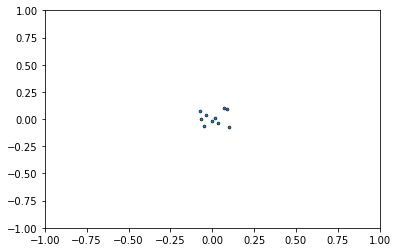

In [ ]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim.to_jshtml())

In [ ]:
#anim.save('../animation/centered2.gif', writer='imagemagick', fps=10)
visualizer.save_animation_to_gif(anim, name, 10)

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>